In [ ]:
"""
Purpose: To take in a whole neuron that could have any number of somas
and then to split it into multiple neuron objects

Pseudocode: 
1) Get all of the split suggestions
2) Split all of the limbs that need splitting
3) Once have split the limbs, split the neuron object into mutliple objects


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

INFO - 2020-12-28 00:53:16,578 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-12-28 00:53:16,579 - settings - Setting database.user to celiib
INFO - 2020-12-28 00:53:16,580 - settings - Setting database.password to newceliipass
INFO - 2020-12-28 00:53:16,597 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-12-28 00:53:16,598 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-28 00:53:16,609 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2020-12-28 00:53:16,833 - settings - Setting enable_python_native_blobs to True


# Picking the Neuron

In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2020-12-28 00:53:16,927 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-28 00:53:17,156 - settings - Setting enable_python_native_blobs to True


In [28]:
minnie.DecompositionMultiSoma() & "n_somas>=3"# & "n_limbs>7"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)


In [6]:
segment_id = 864691135012400886 

In [7]:
neuron_obj = (minnie.DecompositionMultiSoma & dict(segment_id=segment_id)).fetch1("decomposition")
neuron_obj

Decompressing Neuron in minimal output mode...please wait


In [8]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(),
                     mesh_whole_neuron=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Preview of How th Neuron Will Need to be Split

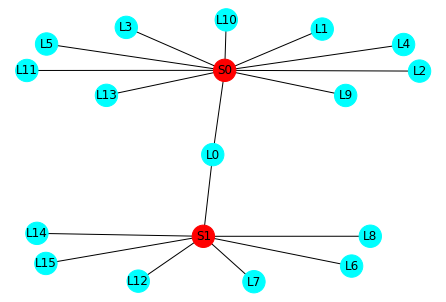

In [9]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [10]:
total_limbs_to_process = nru.error_limbs(neuron_obj)
total_limbs_to_process

array([0])

# Split the Neuron

In [26]:
neuron_list = pru.split_neuron(neuron_obj,
                 plot_seperated_neurons=True)




------ Working on Soma 0 -------
Processing Neuorn in minimal output mode...please wait
Total time for neuron instance creation = 2.3355579376220703


------ Working on Soma 1 -------
Processing Neuorn in minimal output mode...please wait
Total time for neuron instance creation = 0.4698939323425293


Number of seperate neuron objects = 2

 Working on visualization type: mesh

 Working on visualization type: skeleton



 Working on visualization type: mesh

 Working on visualization type: skeleton


# Modules for functionality

In [11]:
import networkx as nx
import networkx_utils as xu
import trimesh_utils as tu
import preprocessing_vp2 as pre
import proofreading_utils as pru

In [13]:
verbose = False

# Function that will do neuron splitting

In [ ]:
def split_neuron(neuron_obj,
                 plot_soma_limb_network=False,
                 plot_seperated_neurons=False,
                verbose=False):
    """
    Purpose: To take in a whole neuron that could have any number of somas
    and then to split it into multiple neuron objects

    Pseudocode: 
    1) Get all of the split suggestions
    2) Split all of the limbs that need splitting
    3) Once have split the limbs, split the neuron object into mutliple objects


    """
    
    #1) Get all of the split suggestions
    limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False,
                                               verbose = verbose)
    
    #2) Split all of the limbs that need splitting
    split_neuron_obj = pru.split_neuron_by_suggestions(neuron_obj,
                                split_suggestions=limb_results,
                                plot_soma_limb_network=plot_soma_limb_network,
                                verbose=verbose)
        
    #2b) Check that all the splits occured
    curr_error_limbs = nru.error_limbs(split_neuron_obj)

    if len(curr_error_limbs) > 0:
        raise Exception(f"There were still error limbs before trying the neuron object split: error limbs = {curr_error_limbs}")
    
    #3) Once have split the limbs, split the neuron object into mutliple objects
    neuron_list = pru.split_disconnected_neuron(split_neuron_obj,
                         plot_seperated_neurons=True,
                         verbose =verbose)

# Part 1: Get the limb Splitting suggestions

In [14]:
import proofreading_utils as pru
limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False,
                                               verbose = verbose)

# Part 2: Split the limbs using the suggested splits

In [ ]:
nru = reload(nru)

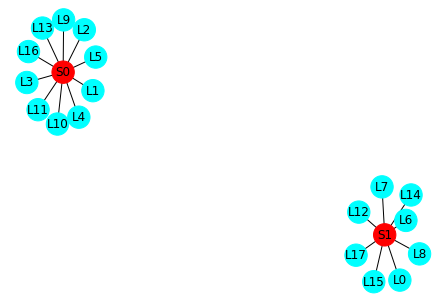

In [19]:
split_neuron_obj = pru.split_neuron_limbs_by_suggestions(neuron_obj,
                                split_suggestions=limb_results,
                                                         plot_soma_limb_network=True,
                                verbose=verbose)

# Part 3: Split into Multiple Neuron Objects (BY THEIR SOMAS)

In [21]:
neuron_list = pru.split_disconnected_neuron(split_neuron_obj,
                         plot_seperated_neurons=True,
                         verbose =verbose)



------ Working on Soma 0 -------
Processing Neuorn in minimal output mode...please wait
Total time for neuron instance creation = 0.5001959800720215


------ Working on Soma 1 -------
Processing Neuorn in minimal output mode...please wait
Total time for neuron instance creation = 0.4772498607635498


Number of seperate neuron objects = 2

 Working on visualization type: mesh

 Working on visualization type: skeleton



 Working on visualization type: mesh

 Working on visualization type: skeleton


In [ ]:
curr_error_limbs = nru.error_limbs(split_neuron_obj)

if len(curr_error_limbs) > 0:
    raise Exception(f"There were still error limbs before trying the neuron object split: error limbs = {curr_error_limbs}")

In [ ]:
soma_names = split_neuron_obj.get_soma_node_names()


In [ ]:
neuron_obj_list = []

for curr_soma_idx,curr_soma_name in enumerate(soma_names):
    print(f"\n\n------ Working on Soma {curr_soma_idx} -------")
    
    neuron_cp = split_neuron_obj
    
    #getting all the soma information we will need for preprocessing
    soma_obj = neuron_cp[curr_soma_name]
    curr_soma_meshes = [soma_obj.mesh]
    curr_soma_sdfs = [soma_obj.sdf]
    curr_soma_volume_ratios = [soma_obj.volume_ratio]
    
    
    
    
    
    # getting the limb information and new soma connectivity
    limb_neighbors = np.sort(xu.get_neighbors(neuron_cp.concept_network,curr_soma_name)).astype("int")
    limb_neighbors = [int(k) for k in limb_neighbors]
    
    soma_to_piece_connectivity = neuron_cp.preprocessed_data["soma_to_piece_connectivity"][curr_soma_idx]

    if len(np.intersect1d(limb_neighbors,soma_to_piece_connectivity)) < len(soma_to_piece_connectivity):
        raise Exception(f"piece connectivity ({soma_to_piece_connectivity}) not match limb neighbors ({limb_neighbors})")

    curr_soma_to_piece_connectivity = {0:np.arange(0,len(limb_neighbors))}
    
    
    
    
    
    
    #getting the whole mesh and limb face correspondence
    mesh_list_for_whole = [soma_obj.mesh]

    #for the limb meshes
    limb_meshes = []

    #for the limb mesh faces idx
    counter = len(curr_soma_meshes[0].faces)
    face_idx_list = [np.arange(0,counter)]

    old_node_to_new_node_mapping = dict()


    for i,k in  enumerate(limb_neighbors):

        #getting the name mapping
        old_node_to_new_node_mapping[k] = i

        #getting the meshes of the limbs
        limb_mesh = neuron_cp[k].mesh
        limb_meshes.append(limb_mesh)


        mesh_list_for_whole.append(limb_mesh)
        face_length = len(limb_mesh.faces)
        face_idx_list.append(np.arange(counter,counter + face_length))
        counter += face_length

    whole_mesh = tu.combine_meshes(mesh_list_for_whole)

    
    
    
    
    
    # generating the new limb correspondence:
    curr_limb_correspondence = dict([(i,neuron_cp.preprocessed_data["limb_correspondence"][k]) for i,k in enumerate(limb_neighbors)])

    
    
    
    
    
    
    
    # concept network generation
    curr_limb_network_stating_info = dict()


    for k in limb_neighbors:

        local_starting_info = neuron_cp.preprocessed_data["limb_network_stating_info"][k]

        #making sure the soma has the right name
        soma_keys = list(local_starting_info.keys())
        if len(soma_keys) > 1:
            raise Exception("More than one soma connection")
        else:
            soma_key = soma_keys[0]

        if soma_key != 0:
            local_starting_info = {0:local_starting_info[soma_key]}


        #making sure the soma group has the right name
        starting_group_keys = list(local_starting_info[0].keys())
        if len(starting_group_keys) > 1 or starting_group_keys[0] != 0:
            raise Exception("Touching group was not equal to 0")

        #save the new starting info
        curr_limb_network_stating_info[old_node_to_new_node_mapping[k]] = local_starting_info

    # creating the new concept networks from the starting info
    curr_limb_concept_networks=dict()

    for curr_limb_idx,new_limb_correspondence_indiv in curr_limb_correspondence.items():
        limb_to_soma_concept_networks = pre.calculate_limb_concept_networks(new_limb_correspondence_indiv,
                                                                            curr_limb_network_stating_info[curr_limb_idx],
                                                                            run_concept_network_checks=True,
                                                                           )   

        curr_limb_concept_networks[curr_limb_idx] = limb_to_soma_concept_networks
    
    
    
    
    
    
    
    
    #limb labels:
    curr_limb_labels = dict()

    for k in limb_neighbors:
        local_limb_labels = neuron_cp.preprocessed_data["limb_labels"][k]
        if local_limb_labels is None or local_limb_labels == "Unlabeled":
            local_limb_labels = []

        local_limb_labels.append(f"Soma_{curr_soma_idx}_originally")
        curr_limb_labels[old_node_to_new_node_mapping[k]] = local_limb_labels

        
        
        
        
        
        
        
        
    #using all of the data to create new preprocessing info
    new_preprocessed_data = preprocessed_data= dict(
            #soma data
            soma_meshes = curr_soma_meshes,
            soma_sdfs = curr_soma_sdfs,
            soma_volume_ratios=curr_soma_volume_ratios,

            #soma connectivity
            soma_to_piece_connectivity = curr_soma_to_piece_connectivity,

            # limb info
            limb_correspondence=curr_limb_correspondence,
            limb_meshes=limb_meshes,
            limb_mehses_face_idx = face_idx_list,
            limb_labels=curr_limb_labels,

            #concept network info
            limb_concept_networks=curr_limb_concept_networks,
            limb_network_stating_info=curr_limb_network_stating_info,


            # the other mesh pieces that will not be included
            insignificant_limbs=None,
            not_processed_soma_containing_meshes=None,
            non_soma_touching_meshes=None,
            inside_pieces=None,


            )

    limb_to_branch_objects = dict()
    for k in limb_neighbors:
        limb_obj = neuron_cp[int(k)]
        branch_dict = dict([(b,limb_obj[int(b)]) for b in limb_obj.get_branch_names()])
        limb_to_branch_objects[old_node_to_new_node_mapping[k]] = branch_dict

    segment_id = neuron_cp.segment_id
    description = f"{neuron_cp.description}_soma_{curr_soma_idx}_split"
    
    
    
    
    
    # new neuron object:
    
    single_split_neuron_obj = neuron.Neuron(mesh=whole_mesh,
             segment_id=segment_id,
             description=description,
             preprocessed_data=new_preprocessed_data,
             limb_to_branch_objects=limb_to_branch_objects,
             widths_to_calculate=[],
            suppress_output=not verbose)
    
    
    neuron_obj_list.append(single_split_neuron_obj)

# Visualizing the results

In [ ]:
print(f"Number of seperate neuron objects = {len(neuron_obj_list)}")

In [ ]:
for n_obj in neuron_obj_list:
    nviz.visualize_neuron(n_obj,
                         visualize_type=["mesh","skeleton"],
                         limb_branch_dict="all")